### Chapter 04 데이터 요약하기
#### 04-1 통계로 요약하기
--- 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ns_book6 = pd.read_csv('data/ns_book6.csv', low_memory = False)
print(ns_book6.shape)
ns_book6.head()

(379323, 13)


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0.0,2021-03-19


In [2]:
## describe()에서 percentile 지정하기 
ns_book7 = ns_book6[ns_book6['도서권수'] > 0]
ns_book7.describe(percentiles = [0.3, 0.6, 0.9])

,번호,발행년도,도서권수,대출건수
count,376129.000000,376129.000000,376129.000000,376129.000000
mean,202798.072382,2008.452079,1.145727,11.609291
std,115202.773565,8.771326,0.474167,19.289781
min,1.000000,1947.000000,1.000000,0.000000
30%,124530.400000,2004.000000,1.000000,2.000000
50%,204321.000000,2009.000000,1.000000,6.000000
60%,243249.800000,2011.000000,1.000000,8.000000
90%,360949.400000,2018.000000,2.000000,28.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [3]:
## describe()에서 수치형 외 변수의 타입 보기 (object = '')
ns_book7.describe(include = 'object')

,도서명,저자,출판사,ISBN,세트 ISBN,부가기호,권,주제분류번호,등록일자
count,376129,376129,376129,376129,55852,308068,61770,359578,376129
unique,335965,248670,21862,350570,14872,17,833,12462,4562
top,승정원일기,세종대왕기념사업회 [편],문학동네,9788937430299,9788937460005,0,1,813.6,1970-01-01
freq,250,302,4409,206,702,158168,13277,14815,28139


In [4]:
## 중복된값 제거 후 통계량 구하기 
print('-중복제거후 평균값 = ', ns_book7['대출건수'].drop_duplicates().mean())
print('-중복제거후 중앙값 = ', ns_book7['대출건수'].drop_duplicates().median())

-중복제거후 평균값 =  208.43596730245233
-중복제거후 중앙값 =  183.0


In [5]:
## quantile() : 특정 분위수 값 구하기 
ns_book7['대출건수'].quantile([0.25, 0.5, 0.75])

0.25     2.0
0.50     6.0
0.75    14.0
Name: 대출건수, dtype: float64

In [6]:
## 수치형 변수들에 대해서만 연산 실행시키기 
ns_book7.mean(numeric_only = True)

번호      202798.072382
발행년도      2008.452079
도서권수         1.145727
대출건수        11.609291
dtype: float64

In [7]:
ns_book7.to_csv('data/ns_book7.csv', index = False)

In [8]:
## np.mean()과 np.average() : np.average는 가중평균 계산에 유용하다. 
np.average(ns_book7['대출건수'], weights = 1/ns_book7['도서권수'])

10.558596726009206

In [9]:
## 연습문제 : 평균 대출건수가 가장 높은 10개의 출판사는? 
ns_book7[['출판사', '대출건수']].groupby('출판사').mean().sort_values('대출건수', ascending = False).head(10)

,대출건수
출판사,
동녁라이프,224.000000
와이비엠시사,215.000000
환상,210.000000
두앤비컨텐츠(랜덤하우스중앙),167.000000
개미들출판사-에셀문화사,157.000000
해커스 어학 연구소,149.500000
Test clinic,137.000000
마야출판사,133.333333
해밀 & Co.,133.000000


In [10]:
## 연습문제 : 대출건수 25%, 75%에 해당하는 도서들이 전체 도서 중 몇퍼센트를 차지하는지 구하라. 
target_range = np.array(ns_book7['대출건수'].quantile(q = [0.25, 0.75]))
target_bool_idx = (ns_book7['대출건수'] >= target_range[0]) & (ns_book7['대출건수'] <= target_range[1]) 
a = target_bool_idx.sum() / len(ns_book7)*100 
a

51.57299756200665

---
#### 04-2 분포 요약하기

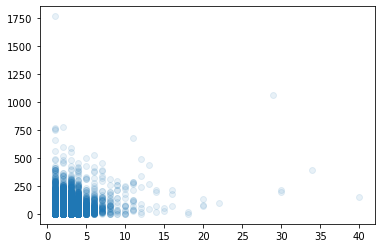

In [16]:
## scatter plot의 alpha : 투명도 지정 (0 ~ 1의 값), 데이터가 많이 중첩된 부분일수록 진하게 표현 
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha = 0.1)

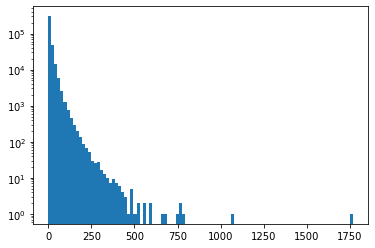

In [18]:
## y축 범위가 하단에 집중 -->  sclae log변환 
## bins 지정 (default bin = 10)
plt.hist(ns_book7['대출건수'], bins = 100)
plt.yscale('log')
plt.show()

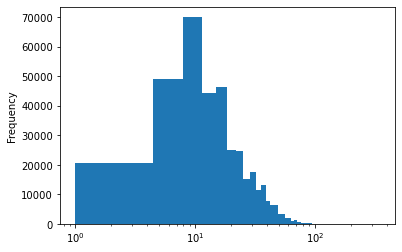

In [24]:
## 책 제목의 길이에 대한 분포 그리기 
ns_book7['도서명'].apply(len).plot.hist(bins=100)
plt.xscale('log')
plt.show()

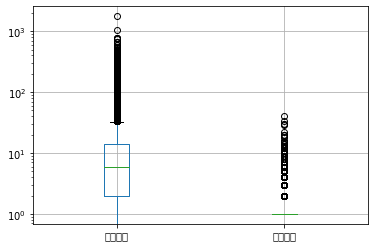

In [23]:
ns_book7[['대출건수', '도서권수']].boxplot()
plt.yscale('log')
plt.show()

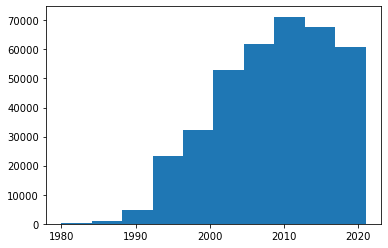

In [29]:
## 연습 : 1980~2022년 사이 발행된 도서에 대해, 발행년도 기준의 히스토그램 만들기 
selected_rows = (ns_book7['발행년도'] >= 1980) & (ns_book7['발행년도'] <= 2022)
plt.hist(ns_book7[selected_rows]['발행년도'])
plt.show()

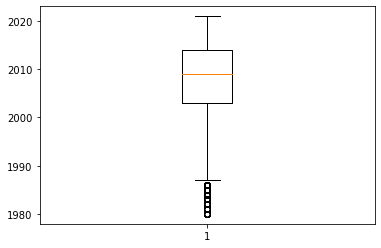

In [34]:
plt.boxplot(ns_book7[selected_rows]['발행년도'])
plt.show()